# Sklearn decision tree & random forests
## 1. dataset link: https://www.kaggle.com/ronitf/heart-disease-uci
## 2. sklearn is implemented to classify the dataset
## 3. training & testing score vs tree depth 
## 4. training & testing score vs forests tree density
## 5. feature importances are calculated by the random forests

# 1. Decision_Tree & Random Forests from sklearn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import math
import random

In [3]:
## load & split data into train & test set
def load_data(name):
    path = os.getcwd()
    data_path = os.path.join(path, name)
    data_raw = pd.read_csv(data_path)
    data_index = data_raw.keys()
    return (data_raw, data_index)


## plot histogram of each attribute
def plot_hist(data_refine, data_refine_index):
    data_zip = list(zip(*data_refine))

    for index in range(len(data_zip)):
        each_attr = data_zip[index]
        low_b = math.floor(min(each_attr))
        upp_b = math.ceil(max(each_attr))
        plt.hist(each_attr, range=[low_b, upp_b])
        plt.title(data_refine_index[index], loc='center')
        plt.grid()
        plt.show()


## split data_test from data_train, split_ration=0.7, 70% data for training, 30% of data for testing
def split_train_test_data(data_refine, data_refine_target, split_ratio, rand=True):
    data_train = []
    data_train_target = []
    data_test=[]
    data_test_target=[]
    train_length = int(len(data_refine) * split_ratio)

    if rand:
        for index in range(train_length):
            pos = random.randint(0, len(data_refine) - 1)
            data_train.append(data_refine.pop(pos))
            data_train_target.append(data_refine_target.pop(pos))

        data_test = data_refine
        data_test_target = data_refine_target

    else:

        data_refine_dic={}

        for index in range(len(data_refine_target)):
            if data_refine_target[index] not in data_refine_dic:
                data_refine_dic[data_refine_target[index]]=[]
                data_refine_dic[data_refine_target[index]].append(data_refine[index])
            else:
                data_refine_dic[data_refine_target[index]].append(data_refine[index])

        for key in list(data_refine_dic.keys()):

            train_length = int(len(data_refine_dic[key]) * split_ratio)

            for index in range(train_length-1):
                data_train.append(data_refine_dic[key].pop(0))
                data_train_target.append(data_refine_target.pop(0))


            for item in data_refine_dic[key]:
                data_test.append(item)
            data_test_target = data_refine_target

    return (data_train, data_train_target, data_test, data_test_target)


# shuffle the categarized data
def shuffle_data_ca(data_ca, data_ca_target):
    data_shf = []
    data_shf_target = []
    for i in range(len(data_ca)):
        loc = random.randint(0, len(data_ca) - 1)
        data_shf.append(data_ca.pop(loc))
        data_shf_target.append(data_ca_target.pop(loc))

    return (data_shf, data_shf_target)

# scale all data into [0,1]
def scale_data(dt_train):
    col_max_min = [(np.min(col), np.max(col)) for col in list(zip(*dt_train)) ]
    for row_index in range(len(dt_train)):
        for col_index in range(len(dt_train[row_index])):
            col_min = col_max_min[col_index][0]
            col_max = col_max_min[col_index][1]
            dt_train[row_index][col_index] = (dt_train[row_index][col_index]-col_min)/(col_max-col_min)
    return dt_train


# put all together
def data_put_all(filename, split_ratio, rand=True):

    # take all features into data_rf and targets into data_rf_target
    data_raw, data_raw_index = load_data(filename)
    data_raw = data_raw.drop(columns=['chol', 'fbs'])
    data_index = data_raw.keys()

    data_lst = data_raw.values.tolist()
    data_rf = [dt[:-1] for dt in data_lst]
    data_rf_target = list(list(zip(*data_lst))[-1])

    data_rf = scale_data(data_rf)

    # normalize feature input as x0, x1, x2, x3....1 for dot product
    for dt in data_rf:
        dt.append(1)

    # normalize feature input target as 1,-1
    for index in range(len(data_rf_target)):
        if data_rf_target[index] == 0.0:
            data_rf_target[index] = -1

    # get data index
    data_index = data_raw_index.values.tolist()
    data_index = data_index[:-1]

    dt_train, dt_train_target, dt_test, dt_test_target = \
        split_train_test_data(data_rf, data_rf_target, split_ratio, rand)

    # shuffle all data
    dt_train, dt_train_target = shuffle_data_ca(dt_train, dt_train_target)
    return (dt_train, dt_train_target, dt_test, dt_test_target, data_index)

# 2. Sklearn Decision Tree

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

In [22]:
# load data
data_raw = load_data('heart_disease_data.csv')
data_raw = data_raw[0]
# data_raw = data_raw.drop(columns=['chol','fbs'])
data_raw_index = list(data_raw.columns)[0:-1]
data_rf = data_raw.iloc[:,0:-1].values.tolist()
data_rf_target = data_raw.iloc[:,-1].values.tolist()
data_train, data_train_target, data_test, data_test_target = split_train_test_data(data_rf, data_rf_target, 0.7, rand=True)
clf = DecisionTreeClassifier(max_depth=2)
clf = clf.fit(data_train[0:10], data_train_target[0:10])
clf.score(data_train[0:10], data_train_target[0:10])

0.9

In [23]:
data_raw = load_data('heart_disease_data.csv')
data_raw = data_raw[0]
data_raw

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


[Text(200.88000000000002, 181.2, 'X[9] <= 2.95\ngini = 0.42\nsamples = 10\nvalue = [3, 7]'),
 Text(133.92000000000002, 108.72, 'X[3] <= 110.0\ngini = 0.219\nsamples = 8\nvalue = [1, 7]'),
 Text(66.96000000000001, 36.23999999999998, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(200.88000000000002, 36.23999999999998, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(267.84000000000003, 108.72, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]')]

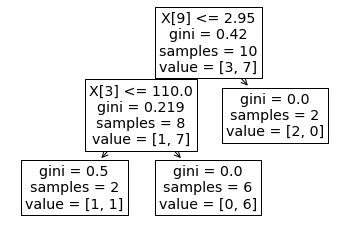

In [24]:
tree.plot_tree(clf)

In [25]:
data_train[0:10]

list(map(lambda row_val: row_val[0], data_train[0:10]))

[41.0, 53.0, 46.0, 47.0, 66.0, 55.0, 59.0, 38.0, 45.0, 48.0]

In [20]:
data_train_target[0:10]

[0, 0, 1, 1, 1, 1, 1, 1, 0, 1]

# 3. Decision tree depth vs score

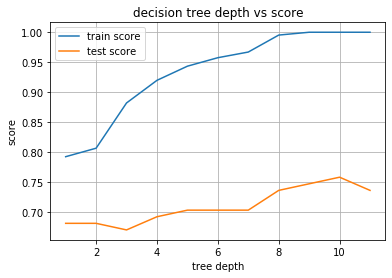

In [37]:
# decision tree
depth_limit = 11
recorder =[]
tree_depth = []
for i in list(range(1,depth_limit+1)):
    clf = DecisionTreeClassifier(max_depth=i)
    clf = clf.fit(data_train, data_train_target)
    tree_depth.append(i)
    recorder.append((clf.score(data_train, data_train_target), clf.score(data_test, data_test_target)))
    
plt.plot(tree_depth, list(zip(*recorder))[0], label='train score')
plt.plot(tree_depth,list(zip(*recorder))[1], label='test score')
plt.xlabel('tree depth')
plt.ylabel('score')
plt.title('decision tree depth vs score')
plt.legend()
plt.grid()
plt.show()

# 3. Random forests tree density vs bias & variance

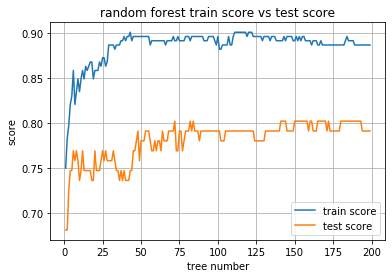

In [38]:
tree_limit = 200
tree_num=[]
recorder=[]
for i in list(range(1,tree_limit)):
    clf = RandomForestClassifier(n_estimators=i, max_depth=2, random_state=0, max_features='sqrt')
    clf.fit(data_train,data_train_target)
    tree_num.append(i)
    recorder.append((clf.score(data_train, data_train_target), clf.score(data_test, data_test_target)))
    
plt.plot(tree_num, list(zip(*recorder))[0], label='train score')
plt.plot(tree_num,list(zip(*recorder))[1], label='test score')
plt.xlabel('tree number')
plt.ylabel('score')
plt.title('random forest train score vs test score')
plt.legend()
plt.grid()
plt.show()

In [39]:
print('feature importances: \n')
for name, score in zip(data_raw_index ,clf.feature_importances_):
    print(name,':',score*100, '%')

feature importances: 

age : 3.7816122443217846 %
sex : 1.7529932381116435 %
cp : 24.891859361781144 %
trestbps : 0.9595770882455821 %
chol : 1.5467923734924438 %
fbs : 0.0 %
restecg : 0.2526773550542454 %
thalach : 11.144365978740115 %
exang : 12.976564196343684 %
oldpeak : 8.671257560424591 %
slope : 4.748905888052488 %
ca : 19.522218469210316 %
thal : 9.751176246221952 %


In [ ]:
def _get_class(split_info_lst,pos):
    
        
        

In [4]:
a=[1,3,4,5,0,-4]
sorted(range(len(a)), key=lambda x: a[x], reverse=False)[0]

5